In [1]:
import numpy as np
import pandas as pd
from arch import arch_model
import pandas_datareader.data as web
from datetime import datetime, timedelta

In [2]:
ind= pd.read_csv(r"C:\Users\saswa\Downloads\^NSEI.csv")
#ind= web.DataReader('SPY', 'yahoo', start=start, end=end)

In [20]:
#returns = 100 * ind['Adj Close'].pct_change().dropna()
returns=100* pd.Series(np.diff(np.log(ind['Adj Close'].values)))

0      3.729049
1      3.223494
2      4.568302
3     -4.002022
4      8.927299
         ...   
758    0.642513
759   -1.751033
760   -1.753131
761   -0.404957
762    0.000000
Length: 763, dtype: float64

In [52]:
model= arch_model(returns, p=3, q=0)
model_fit= model.fit(disp='off')

In [53]:
model_fit.summary()         #One way to evaluate is if the alpha and beta values are significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1796.08
Distribution:                  Normal   AIC:                           3602.16
Method:            Maximum Likelihood   BIC:                           3625.35
                                        No. Observations:                  763
Date:                Mon, May 02 2022   Df Residuals:                      762
Time:                        09:46:02   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2109  8.370e-02      2.520  1.175e-02 [4.685e-02,  0.375]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.0134      0.394      7.642  2.139e-14   [  2.241,  3.786]
alpha[1]       0.1726  5.061e-02      3.410  6.493e-04 [7.340e-02,  0.272]
alpha[2]       0.2800  9.341e-02      2.998  2.720e-03 [9.694e-02,  0.463]
alpha[3]       0.1871  4.842e-02      3.864  1.117e-04 [9.217e-02,  0.282]
==========================================================================

Covariance estimator: robust
"""

In [71]:
#ROLLING FORECAST
rolling_preds=[]
test_size= 52*5
for i in range(test_size):
    train= returns[:-(test_size-i)]
    model= arch_model(train, p=3, q=0)
    model_fit= model.fit(disp= 'off')
    pred= model_fit.forecast(horizon=1, reindex=True)
    rolling_preds.append(np.sqrt(pred.variance.values[-1,:][0]))

In [72]:
rolling_preds= pd.Series(rolling_preds, index=returns.index[-test_size:])

In [73]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Week Period')

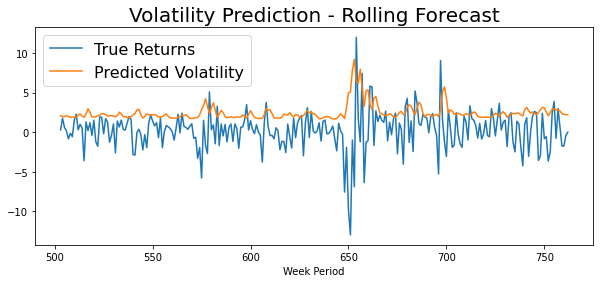

In [75]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_preds)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)
plt.xlabel('Week Period')

In [77]:
rolling_preds.iloc[-1]

2.211757986120927